### Домашняя работа 2.
### Логистическая регрессия. Работа с признаками


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 15 баллов. Можно получить 4.5 бонусных балла.

Неэффективная реализация кода может негативно отразиться на оценке.

In [ ]:
print('Всем удачи!👒 Тут она точно пригодится.')

Всем удачи!👒 Тут она точно пригодится.


In [7]:
%pylab inline
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Логистическая регрессия своими руками (4 балла)

Реализуйте логистическую регрессию, обучаемую с помощью:

**Задание 1 (1.5 балла). Градиентного спуска**

**Задание 2 (1.5 балла). Стохастического градиентного спуска**

Во всех пунктах необходимо соблюдать следующие условия:
- Градиентный спуск необходимо записать в векторном виде
- Циклы средствами python допускается использовать только для итераций градиентного спуска;
- В качестве критерия останова необходимо использовать (одновременно):

        проверку на евклидову норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) задаваемого параметром `tolerance`;


        достижение максимального числа итераций (например, 10000), задаваемого параметром `max_iter`.

Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса loss_history. В нём после вызова метода fit должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту);

Инициализировать веса можно случайным образом или нулевым вектором.

Полезно [почитать](https://scikit-learn.org/stable/developers/develop.html).

In [8]:
import numpy as np
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, gd_type='stochastic',
                 tolerance=1e-5, max_iter=100, w0=None, eta=1e-2):
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.w = w0
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration

    def fit(self, X, y):
        if self.w0 is None:
            self.w0 = np.zeros(X.shape[1])
        self.w = self.w0
        self.loss_history = [self.calc_loss(X, y)]

        for _ in range(self.max_iter):
            grad = self.calc_gradient(X, y)
            self.w -= self.eta * grad
            if np.linalg.norm(grad) < self.tolerance:
                break
            self.loss_history.append(self.calc_loss(X, y))

        return self

    def predict_proba(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        z = X.dot(self.w)
        return 1 / (1 + np.exp(-z))


    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        probas = self.predict_proba(X)
        predictions = (probas > 0.5).astype(int)
        return predictions

    def calc_gradient(self, X, y):
        probabilities = self.predict_proba(X)
        grad = (-1 / X.shape[0]) * (y - probabilities).dot(X)
        return grad

    def calc_loss(self, X, y):
        z = X.dot(self.w)
        probability = 1 / (1 + np.exp(-z))
        epsilon = 1e-15
        loss = (-1 / X.shape[0]) * (y * np.log(probability + epsilon) + (1 - y) * np.log(1 - probability + epsilon)).sum()
        return loss

Синтетические данные

In [9]:
%pylab inline
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [10]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

**Важно:** далее предполагается, что вы используете собственную реализацию логистической регрессии.
Если с написанием класса возникли проблемы, используйте реализацию sklearn, чтобы не терять баллы за остальные задания.

**Задание 3 (1 балл)**

Обучите логистическую регрессию на синтетических данных.

In [11]:
w0 = np.zeros(X_train.shape[1])
model = LogReg(gd_type='full', w0=w0, max_iter=1000)
model.fit(X_train, y_train)

LogReg(gd_type='full', max_iter=1000,
       w0=array([ 2.53654757e-01,  7.39842220e-02, -2.67006338e-01, -9.54009519e-02,
        8.39590465e-02, -5.83234159e-02,  9.56747331e-02, -8.19859778e-02,
        2.10130401e-01,  1.00829994e-02, -7.44151795e-02,  3.99242943e-02,
        1.39682126e-01, -1.74301483e-04,  5.90198807e-02, -2.17694362e-01,
        5.63442010e-03, -1.74256369e-01,  1.60601642e-01,  3.80953624e-02]))

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые. Проинтерпретируйте результат.

In [12]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, precision_score

predicts = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predicts)
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(y_test, predicts)
pr_auc = auc(recall, precision)

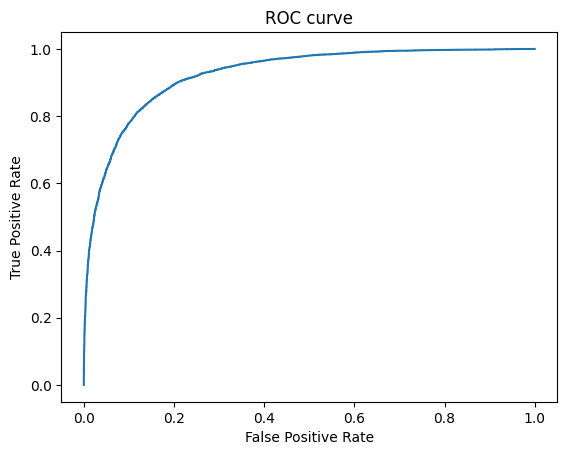

In [13]:
plt.plot(fpr, tpr, label='ROC curve')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

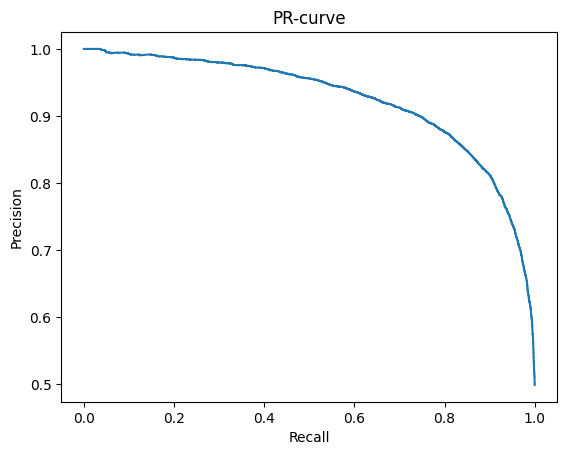

In [14]:
plt.plot(recall, precision)
plt.title('PR-curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [15]:
print(f"""
Получили высокие значения обеих метрик:
ROC-AUC = {roc_auc}
PR-AUC = {pr_auc}
Это свидетельствует в пользу того, что модель работает приемлемо. Показания ROC-AUC и PR-AUC высокие - 0.925 (близкие к 1.0), это указывает на то, что модель обладает хорошей предсказательной способностью.
""")


Получили высокие значения обеих метрик:
ROC-AUC = 0.9258093638609841
PR-AUC = 0.9243957198617139
Это свидетельствует в пользу того, что модель работает приемлемо. Показания ROC-AUC и PR-AUC высокие - 0.925 (близкие к 1.0), это указывает на то, что модель обладает хорошей предсказательной способностью.



## Часть 2. Работа с категориальными переменными (3 балла)

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом для задания мы немного модифицируем датасет.

In [16]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [17]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

**Задание 5 (0 баллов).** Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

In [18]:
w0 = np.zeros(X_train.shape[1])
model = LogReg(gd_type='stochastic', w0=w0) # инициализируем модель
model.fit(X_train, y_train) # обучаем модель

predicts = model.predict_proba(X_test) # вычислили предсказания вероятностей классов для тестовых данных
# рассчитали ROC кривую и ROC-AUC с использованием функций roc_curve и auc из библиотеки sklearn.metrics
fpr, tpr, thresholds = roc_curve(y_test, predicts)
roc_auc = auc(fpr, tpr)
# выведем значение метрики
print(f'ROC-AUC = {roc_auc}')

ROC-AUC = 0.5213755423078078


**Задание 6 (0.5 балла).** Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

In [19]:
from sklearn.preprocessing import OneHotEncoder

# определим категориальные признаки, которые начинаются с 'cat'
cat_features = []
for col in data.columns.values.tolist():
  if 'cat' in col:
    cat_features.append(col)

# используем OneHotEncoder для преобразования категориальных признаков в бинарные (one-hot)
enc = OneHotEncoder(drop = 'first')

transformed_train = enc.fit_transform(X_train[cat_features])
transformed_train = pd.DataFrame.sparse.from_spmatrix(transformed_train, columns=enc.get_feature_names_out())
X_train_cat = pd.concat([transformed_train, X_train.reset_index(drop=True)], axis=1).drop(cat_features, axis=1)

transformed_test = enc.transform(X_test[cat_features])
transformed_test = pd.DataFrame.sparse.from_spmatrix(transformed_test, columns=enc.get_feature_names_out())

# сконкантерируем закодированные признаки
X_test_cat = pd.concat([transformed_test, X_test.reset_index(drop=True)], axis=1).drop(cat_features, axis=1)

In [20]:
%%time
w0 = np.zeros(X_train_cat.shape[1])
model = LogReg(gd_type='stochastic', w0=w0) # инициировали модель логистической регрессии
model.fit(X_train_cat, y_train) # обучаем модель

CPU times: user 18.1 s, sys: 18.8 s, total: 36.8 s
Wall time: 20.8 s


LogReg(w0=array([-3.84591530e-03,  3.22700857e-03, -3.72845780e-05,  4.52538689e-04,
       -7.30768194e-03,  7.14340366e-03, -1.70644944e-02,  1.10979587e-03,
        2.04801719e-03,  7.96822819e-04,  4.01726191e-03,  2.67773254e-04,
        5.84917347e-03,  4.08983227e-04,  2.87515923e-04,  1.88010007e-04,
       -3.08740680e-04,  5.31574471e-04,  6.55427147e-04, -5.26231482e-03,
       -1.46228094e-02,  1.15607203e...
        2.62076926e-03,  1.46515176e-02, -1.84599863e-03,  2.68118996e-02,
        1.21224666e-03,  2.49272441e-04,  6.49114743e-04, -8.87529499e-04,
       -1.01341700e-04,  3.09115110e-03, -1.95144754e-04, -3.42394154e-03,
       -2.79215234e-04, -2.25105934e-04,  5.67310289e-04, -4.19419285e-03,
       -3.26279986e-03,  4.26843167e-03, -1.84352048e-04,  7.17424400e-05,
       -7.01000541e-04,  9.25647005e-04,  2.06393741e-04, -1.23898409e-03]))

In [21]:
predicts = model.predict_proba(X_test_cat)
fpr, tpr, thresholds = roc_curve(y_test, predicts)
roc_auc = auc(fpr, tpr)
print(f'ROC-AUC = {roc_auc}')

ROC-AUC = 0.5823037003851733


Как можно было заменить, one-hot-кодирование сильно увилечивает количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 7 (1.5 балла).__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше, без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущим экспериментом. Заметили ли вы что-то интересное?


In [22]:
# для каждой категориальной переменной вычислили среднее значение целевой переменной для каждой уникальной категории в обучающем наборе данных
# Заменим значение категориальных переменных на средние значения
for feature in cat_features:
    full = pd.concat([X_train.reset_index(drop=True), pd.Series(y_train, name='target')], axis=1)
    replace = full.groupby(feature).agg({'target': 'mean'}).to_dict()['target']
    X_train[feature] = X_train[feature].replace(replace)
    X_test[feature] = X_test[feature].replace(replace)
print(X_train.iloc[0, :])

ps_ind_01          0.000000
ps_ind_02_cat      0.495424
ps_ind_03          5.000000
ps_ind_04_cat      0.486512
ps_ind_05_cat      0.479374
ps_ind_06_bin      1.000000
ps_ind_07_bin      0.000000
ps_ind_08_bin      0.000000
ps_ind_09_bin      0.000000
ps_ind_10_bin      0.000000
ps_ind_11_bin      0.000000
ps_ind_12_bin      0.000000
ps_ind_13_bin      0.000000
ps_ind_14          0.000000
ps_ind_15          5.000000
ps_ind_16_bin      1.000000
ps_ind_17_bin      0.000000
ps_ind_18_bin      0.000000
ps_reg_01          0.600000
ps_reg_02          0.300000
ps_reg_03          0.868188
ps_car_01_cat      0.446192
ps_car_02_cat      0.479677
ps_car_03_cat      0.472847
ps_car_04_cat      0.476990
ps_car_05_cat      0.524454
ps_car_06_cat      0.483755
ps_car_07_cat      0.487977
ps_car_08_cat      0.487694
ps_car_09_cat      0.476309
ps_car_10_cat      0.500136
ps_car_11_cat      0.535928
ps_car_11          2.000000
ps_car_12          0.417971
ps_car_13          0.963540
ps_car_14          0

In [23]:
%%time
w0 = np.zeros(X_train.shape[1])
model = LogReg(gd_type='stochastic', w0=w0) # инициируем модель логистической регрессии
model.fit(X_train, y_train) # обчучаем модель

CPU times: user 4.66 s, sys: 5.46 s, total: 10.1 s
Wall time: 5.31 s


LogReg(w0=array([ 3.23284150e-02,  2.44964272e-04,  1.71687835e-02,  4.34583413e-04,
        2.82866759e-03, -1.92787760e-02,  1.76758805e-02,  5.97680572e-03,
       -4.34323403e-03,  2.42793382e-05,  9.26683209e-05,  1.17624807e-03,
        1.40430687e-04,  1.43362641e-03, -3.25386389e-02, -1.30880368e-02,
        1.47853216e-02, -1.68216004e-03,  7.65232035e-03,  1.78326798e-02,
        2.99216463e-02,  2.54609576e-0...
       -1.87366861e-03,  2.60307221e-03,  1.48216866e-02, -1.98954118e-03,
        2.66584817e-02,  1.12962119e-03,  1.62185815e-04,  5.68836836e-04,
       -1.26441150e-03, -3.96205233e-04,  1.89121270e-03, -6.60018636e-04,
       -4.85714890e-03, -5.84262833e-04, -9.79776297e-04, -9.60804590e-05,
       -4.45796607e-03, -3.69925373e-03,  3.54144951e-03, -2.00157673e-04,
       -4.35215025e-05, -8.19289395e-04,  8.80823455e-04,  1.46178785e-04,
       -1.27351851e-03]))

In [24]:
predicts = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predicts)
roc_auc = auc(fpr, tpr)
print(f'ROC-AUC = {roc_auc}')

ROC-AUC = 0.5702190634111545


Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо так, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки.

__Задание 8 (1 балл)__. Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.


In [25]:
# добавим случайный шум
noise = np.random.normal(0, 0.1, size=X_train[cat_features].shape)
X_train[cat_features] += noise
noise = np.random.normal(0, 0.1, size=X_test[cat_features].shape)
X_test[cat_features] += noise

In [26]:
%%time
w0 = np.zeros(X_train.shape[1])
model = LogReg(gd_type='stochastic', w0=w0) # инициализируем модель
model.fit(X_train, y_train)

CPU times: user 4.76 s, sys: 5.34 s, total: 10.1 s
Wall time: 5.2 s


LogReg(w0=array([ 3.23286101e-02,  3.62705512e-04,  1.71687417e-02,  4.02389687e-04,
        3.06176039e-03, -1.92790971e-02,  1.76756731e-02,  5.97691308e-03,
       -4.34337513e-03,  2.42889915e-05,  9.26749414e-05,  1.17621968e-03,
        1.40438638e-04,  1.43362226e-03, -3.25400357e-02, -1.30883859e-02,
        1.47852650e-02, -1.68230396e-03,  7.65197167e-03,  1.78326417e-02,
        2.99213112e-02,  2.54816773e-0...
       -1.87489111e-03,  2.60288251e-03,  1.48213138e-02, -1.98972470e-03,
        2.66569859e-02,  1.12934137e-03,  1.62020937e-04,  5.68399494e-04,
       -1.26552191e-03, -3.97622074e-04,  1.88807070e-03, -6.61065409e-04,
       -4.86187772e-03, -5.85601932e-04, -9.81180786e-04, -9.81341967e-05,
       -4.45899212e-03, -3.70008668e-03,  3.53951067e-03, -2.00218458e-04,
       -4.41673521e-05, -8.19853160e-04,  8.80704554e-04,  1.46109571e-04,
       -1.27384029e-03]))

In [27]:
predicts = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predicts)
roc_auc = auc(fpr, tpr)
print(f'ROC-AUC = {roc_auc:}')

ROC-AUC = 0.5702174546111314


## Часть 3. Отбор признаков (3 балла + 1 бонус)

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом они увеличивают время вычислений) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [28]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [29]:
#используем OneHotEncoder для преобразования категориальных признаков в бинарные и преобразуем результаты
enc = OneHotEncoder(drop = 'first')

transformed_train = enc.fit_transform(X_train[cat_features])
transformed_train = pd.DataFrame.sparse.from_spmatrix(transformed_train, columns=enc.get_feature_names_out())
X_train_cat = pd.concat([transformed_train, X_train.reset_index(drop=True)], axis=1).drop(cat_features, axis=1)

transformed_test = enc.transform(X_test[cat_features])
transformed_test = pd.DataFrame.sparse.from_spmatrix(transformed_test, columns=enc.get_feature_names_out())
X_test_cat = pd.concat([transformed_test, X_test.reset_index(drop=True)], axis=1).drop(cat_features, axis=1)

print(f'Мы получили {X_train_cat.shape[1]} признаков')

Мы получили 213 признаков


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [30]:
w0 = np.zeros(X_train_cat.shape[1])
model = LogReg(gd_type='stochastic', w0=w0, max_iter=100)
model.fit(X_train_cat, y_train)

LogReg(w0=array([-6.51248690e-03, -2.12944069e-03, -3.52737825e-04,  2.22895911e-06,
       -6.25183211e-03, -2.73715853e-03, -1.01309217e-02,  3.67937803e-05,
        2.34235693e-04, -1.50547390e-05,  1.95149296e-04,  1.42046126e-05,
        4.36282177e-04, -2.99552030e-06, -7.11627658e-06, -1.71090027e-05,
       -1.01160486e-04, -3.28246125e-04, -1.97369781e-04, -1.65473263e-03,
       -4.95646585e-03, -3....
       -2.05919730e-02, -2.96122923e-03, -4.96541316e-03, -2.86285294e-03,
       -2.33286693e-02, -3.95385247e-03, -4.05167366e-03, -3.87651954e-03,
       -2.02226575e-02, -1.62019857e-02, -6.45725214e-02, -2.51838072e-02,
       -7.71120844e-02, -1.95946671e-02, -5.67532809e-02, -4.04918833e-02,
       -1.25909701e-02, -2.31968332e-02, -5.19062652e-02, -1.10628105e-03,
       -5.54080235e-03, -4.89109287e-03, -2.55769070e-03, -3.25977610e-03,
       -1.38934781e-03]))

In [31]:
predicts = model.predict_proba(X_test_cat)
fpr, tpr, thresholds = roc_curve(y_test, predicts)
roc_auc = auc(fpr, tpr)
print(f'ROC-AUC = {roc_auc}')

ROC-AUC = 0.5103994409580261


### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 10 (1 балл).__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков.

Изменилось ли качество? Как?

In [32]:
%%time
# Вычислили абсолютные значения параметров модели и отсортируем их
params = np.abs(model.w).values.argsort()[-200:]
# сделаем новые наборы
X_train_sorted = X_train_cat.iloc[:, params]
X_test_sorted = X_test_cat.iloc[:, params]

CPU times: user 24.4 ms, sys: 11.5 ms, total: 35.9 ms
Wall time: 36.5 ms


А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки.

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import numpy as np

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cat)
X_test_scaled = scaler.transform(X_test_cat)

# Инициализация и обучение модели
w0 = np.zeros(X_train_scaled.shape[1])
model = LogReg(gd_type='stochastic', w0=w0, max_iter=100)
model.fit(X_train_scaled, y_train)

# Предсказание и вычисление ROC-AUC
predicts = model.predict_proba(X_test_scaled)
roc_auc = auc(*roc_curve(y_test, predicts)[:2])
print(f'Качество на масштабированных данных: ROC-AUC = {roc_auc}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Качество на масштабированных данных: ROC-AUC = 0.6330188004746173


In [34]:
from sklearn.metrics import roc_curve, auc

# Выборка 200 самых значимых признаков
X_train_sorted = X_train_scaled[:, np.abs(model.w).argsort()[-200:]]
X_test_sorted = X_test_scaled[:, np.abs(model.w).argsort()[-200:]]

# Инициализация и обучение модели
w0 = np.zeros(X_train_sorted.shape[1])
model = LogReg(gd_type='stochastic', w0=w0, max_iter=100)
model.fit(X_train_sorted, y_train)

# Предсказание и вычисление ROC-AUC
predicts = model.predict_proba(X_test_sorted)
roc_auc = auc(*roc_curve(y_test, predicts)[:2])
print(f'Качество на 200 наиболее значимых признаках: ROC-AUC = {roc_auc}')


Качество на 200 наиболее значимых признаках: ROC-AUC = 0.63301925638288


__Задание 10 (0.5 балла).__
Можно задать отбор признаков более функционально. Вспомним, что L1-регуляризация также умеет отбирать признаки. Понятно, что теперь нам будет сложнее оставить именно 200 лучших признаков, но возможно они нам и не нужны. Подберите коэффициент регуляризации и проверьте, как изменилось качество. Получилось ли добиться лучшего качества при менее чем 200 признаках?

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Обучение модели с L1-регуляризацией
model = LogisticRegression(penalty='l1', C=0.01, max_iter=100, solver='liblinear')
model.fit(X_train_scaled, y_train)

# Оценка качества модели
predicts = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, predicts)
print(f'ROC-AUC = {roc_auc}')

# Подсчет количества выбранных признаков
num_features = np.sum(model.coef_ != 0)
print(f'Количество выбранных признаков: {num_features}')


ROC-AUC = 0.6384280229040726
Количество выбранных признаков: 130


### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods.

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $mu$, $sigma$, $n$ соответственно среднее, среднеквадратичное отклонение и количество объектов каждого из классов.

Если у вас был курс математической статистики, то вы без труда узнаете статистику гипотезы о разности средних при неизвестных дисперсиях. Если же нет, то интуиция следующая. Вообще мы хотим понять, различаются ли распределения признака для двух разных классов. Мы проверяем, что математические ожидания двух распределений различаются. Если они различаются, значит и сами распределения разные. Отсюда можно сделать вывод, что по этому признаку модель сможет отличить один класс от другого. А если распределения неотличимы и статистика маленькая, то и признак бесполезен.

Важно оговориться, что хотя мы и не используем статистическое тестирование явно, предпосылки о том, что наблюдения независимы, одинаково распределены и n велико, должны соблюдаться, иначе статистика не имеет смысла. Но у нас большая выборка, поэтому они выполняются. По-хорошему, конечно, надо бы сравнивать статистику с пороговым значением t-распределения и полноценно тестировать гипотезу, но мы обойдёмся простой эвристикой и возьмём признаки с наибольшим значением.


__Задание 11 (1 балл)__. Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков в этом случаев.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np
import time

# Функция для расчета t-статистики
def t_stat(x):
    x_pos = x[y_train == 1]
    x_neg = x[y_train == 0]
    mu_plus = np.mean(x_pos)
    mu_minus = np.mean(x_neg)
    sigma_plus = np.std(x_pos)
    sigma_minus = np.std(x_neg)
    return abs(mu_plus - mu_minus) / np.sqrt((len(x_pos) * sigma_plus**2 + len(x_neg) * sigma_minus**2) / (len(x_pos) + len(x_neg)))

# Замер времени начала
start_time = time.time()

# Отбор признаков
scores = np.apply_along_axis(t_stat, axis=0, arr=X_train_scaled).argsort()[-200:]
X_train_selected = X_train_scaled[:, scores]
X_test_selected = X_test_scaled[:, scores]

# Обучение модели
model = LogisticRegression()
model.fit(X_train_selected, y_train)

# Оценка качества модели
predicts = model.predict_proba(X_test_selected)[:, 1]
roc_auc = roc_auc_score(y_test, predicts)
print(f'ROC-AUC = {roc_auc}')

# Замер времени окончания и вывод результата
end_time = time.time()
print(f"Время выполнения: {end_time - start_time} секунд")


ROC-AUC = 0.6380421913725285
Время выполнения: 14.183801651000977 секунд


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
# Отбор 130 признаков
scores = np.apply_along_axis(t_stat, axis=0, arr=X_train_scaled).argsort()[-130:]

# Обучение модели LogReg
w0 = np.zeros(X_train_scaled[:, scores].shape[1])
model = LogReg(gd_type='stochastic', w0=w0, max_iter=100, eta=1e-2)  # Указывайте параметры, если они отличаются от значений по умолчанию
model.fit(X_train_scaled[:, scores], y_train)

# Оценка качества модели
predicts = model.predict_proba(X_test_scaled[:, scores])
roc_auc = auc(*roc_curve(y_test, predicts)[:2])
print(f'Качество c использованием фильтрации по t-статистике до 130 признаков: ROC-AUC = {roc_auc}')

Качество c использованием фильтрации по t-статистике до 130 признаков: ROC-AUC = 0.632898781615831


### Методы-обёртки

__Задание 12 (бонус, 1 балл)__.


Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо.

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [42]:
X_test_scaled.shape[1]

213

In [43]:
%%time
w0 = np.zeros(213)
model = LogReg(gd_type='stochastic', w0=w0, max_iter=100)
model.fit(X_train_scaled[:, :213], y_train)

CPU times: user 18.2 s, sys: 2.87 s, total: 21.1 s
Wall time: 13.5 s


LogReg(w0=array([-1.01086438e-03,  8.51283778e-04, -3.86106621e-05,  4.46049409e-04,
       -1.14703681e-03,  1.05307801e-03, -5.66346514e-03,  9.01417315e-04,
        2.82184396e-03,  6.27186674e-04,  2.07057508e-03,  5.03369712e-04,
        3.31175805e-03,  6.72460684e-04,  1.97291766e-04,  4.49377639e-04,
        2.53966535e-04,  4.25154071e-04,  2.71050813e-04, -1.40843239e-03,
       -3.14674582e-03,  1.05324562e-...
       -4.35004632e-04,  3.89787387e-03,  5.72264138e-03, -6.92252749e-04,
        3.20904313e-03,  1.97502701e-04, -1.14665384e-04,  3.95429309e-04,
        5.33580395e-05, -3.84889189e-05,  7.75158196e-05, -3.68804814e-05,
       -2.86520701e-04,  1.77901693e-04,  9.08463995e-05,  3.64064997e-05,
       -2.44741933e-04,  5.03799974e-05,  1.72159634e-04, -3.01102643e-05,
        4.28401403e-05,  4.54096629e-05,  1.32720122e-05, -3.09844814e-04,
       -1.10746786e-05]))

In [44]:
np.random.seed(42)
indices = np.random.choice(np.arange(X_train_scaled.shape[0]), 10000)
X_train_small = X_train_scaled[indices]
y_train_small = y_train[indices]

X_test_small, X_val_small, y_test_small, y_val_small = train_test_split(X_test_scaled, y_test, test_size=0.5, random_state=42)

In [45]:
w0 = np.zeros(X_train_small.shape[1])
model = LogReg(gd_type='stochastic', w0=w0)
model.fit(X_train_small, y_train_small)

predicts = model.predict_proba(X_val_small)
fpr, tpr, thresholds = roc_curve(y_val_small, predicts)
roc_auc = auc(fpr, tpr)
print(f'Качество при обучении на 10000 признаков без отбора: ROC-AUC = {roc_auc}')

Качество при обучении на 10000 признаков без отбора: ROC-AUC = 0.56723


In [ ]:
%%time
for _ in range(X_train_small.shape[1]-200):
  roc_auc = 0
  index_to_remove = 0
  for i in range(X_train_small.shape[1]):
    X_train_small_temp = np.delete(X_train_small, [i], axis=1)
    X_test_small_temp = np.delete(X_test_small, [i], axis=1)

    w0 = np.zeros(X_train_small_temp.shape[1])
    model = LogReg(gd_type='stochastic', w0=w0)
    model.fit(X_train_small_temp, y_train_small)

    predicts = model.predict_proba(X_test_small_temp)
    fpr, tpr, thresholds = roc_curve(y_test_small, predicts)
    roc_auc_temp = auc(fpr, tpr)

    if roc_auc_temp > roc_auc:
      roc_auc = roc_auc_temp
      index_to_remove = i

  X_train_small = np.delete(X_train_small, [index_to_remove], axis=1)
  X_test_small = np.delete(X_test_small, [index_to_remove], axis=1)
  X_val_small = np.delete(X_val_small, [index_to_remove], axis=1)
  print(f'После удаление признака №{index_to_remove} качество модели на тестовых данных стало {roc_auc}')

In [79]:
w0 = np.zeros(X_train_small.shape[1])
model = LogReg(gd_type='stochastic', w0=w0)
model.fit(X_train_small, y_train_small)

predicts = model.predict_proba(X_val_small)
fpr, tpr, thresholds = roc_curve(y_val_small, predicts)
roc_auc = auc(fpr, tpr)
print(f'Качество модели, обученной на 10000 признаков c отбором 200 признаков методом-обертки составило: ROC-AUC = {roc_auc}')

Качество модели, обученной на 10000 признаков c отбором 200 признаков методом-обертки составило: ROC-AUC = 0.57627


Опционально (это не оценивается) можете рассмотреть более интересные стратегии отбора, чем жадная. Например, генетические алгоритмы. Можно закодировать бинарным вектором, включаем мы или нет тот или иной признак в модель. А дальше генетическим алгоритмом оптимизировать этот вектор. Всё ещё не быстро, но точно быстрее жадного.


**Задание 13 (0.5 балла)** Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству? Если не делали бонус — сравните встроенный метод и метод фильтрации.

**Ответ:** ...

## Метод фильтрации
### Преимущества:

* Не зависит от модели машинного обучения.
* Легко масштабируется на большие наборы данных.

### Недостатки:

* Игнорирует взаимодействие между признаками.
Решение о количестве оставляемых признаков может быть неочевидным.


## Встроенные методы
### Преимущества:

* Интегрированы в процесс обучения, что обеспечивает лучшую адаптацию к задаче.
* Способны учитывать взаимосвязи между признаками.

### Недостатки:

* Результаты зависят от выбранной модели.
* Риск переобучения при неправильной настройке гиперпараметров.

## Методы-обертки

### Преимущества:

* Подходят для достижения максимально возможного качества модели, в нашем случае не удалось.
* Позволяют оценить влияние каждого признака на производительность модели.

### Недостатки:

* Требуют значительных вычислительных ресурсов и времени.
* Риск переобучения из-за интенсивного тестирования модели на разных подмножествах признаков.

## Метод, который привёл к наилучшему качеству


Встроенные методы
Качество при обучении 200 признаках ROC-AUC = 0.6380421913725285